# Importing Dataset and initial Preprocessing

In [121]:
# importing required packages for data analysis.
import pandas as pd # for reading dataset and manipulation
import matplotlib.pyplot as plt # standard data visulization package.
import seaborn as sns # Data visulization package based on matplotlib.
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%pylab inline
rcParams['figure.figsize'] = (10, 10)


Populating the interactive namespace from numpy and matplotlib


In [122]:
#importing sales,feature and Store dataset
Store_df = pd.read_csv(r'stores_data_set.csv')
Feature_df = pd.read_csv(r'Features_data_set.csv')
Sales_df = pd.read_csv(r'sales_data_set.csv')

In [123]:
#printing the size of the dataset.
print(Store_df.shape)
print(Feature_df.shape)
print(Sales_df.shape)

(45, 3)
(8190, 12)
(421570, 5)


In [124]:
# Print Store dataset info.
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [125]:
# Print Feature dataset info.
Feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [126]:
# Print Sales Dataset info.
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [127]:
# Convert the daa type of Date column to date type as in the above staeps its not in appropriate format.
Feature_df['Date'] = pd.to_datetime(Feature_df['Date'])
Sales_df['Date'] = pd.to_datetime(Sales_df['Date'])

# Merging Sales, Feature and Store dataset. 

In [128]:
# Merging Sales and Featire dataset on columns Store , Date and Is Holiday column(commom in both dataset)
data_intermediate = pd.merge(Sales_df,Feature_df, on=['Store','Date','IsHoliday'], how='left')
data = pd.merge(data_intermediate,Store_df, how='left', on= ['Store'])

In [129]:
# Printing combined data info.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


In [130]:
# Finding null values in each columns
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [131]:
# filling NA value with 0 as there are four numeric columns having null value.
data = data.fillna(0)

In [132]:
# Finding if data have duplicates.
data.duplicated().sum() # All the record in the dataset are unique.

0

In [133]:
# FInding five point summary of the combined dataset.
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00
mean,22.20,44.26,15981.26,60.09,3.36,2590.07,879.97,468.09,1083.13,1662.77,171.20,7.96,136727.92
std,12.79,30.49,22711.18,18.45,0.46,6052.39,5084.54,5528.87,3894.53,4207.63,39.16,1.86,60980.58
min,1.00,1.00,-4988.94,-2.06,2.47,0.00,-265.76,-29.10,0.00,0.00,126.06,3.88,34875.00
25%,11.00,18.00,2079.65,46.68,2.93,0.00,0.00,0.00,0.00,0.00,132.02,6.89,93638.00
50%,22.00,37.00,7612.03,62.09,3.45,0.00,0.00,0.00,0.00,0.00,182.32,7.87,140167.00
75%,33.00,74.00,20205.85,74.28,3.74,2809.05,2.20,4.54,425.29,2168.04,212.42,8.57,202505.00
max,45.00,99.00,693099.36,100.14,4.47,88646.76,104519.54,141630.61,67474.85,108519.28,227.23,14.31,219622.00


In [134]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.55,0.00,0.00,0.00,0.00,0.00,211.24,8.11,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.51,0.00,0.00,0.00,0.00,0.00,211.29,8.11,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.56,0.00,0.00,0.00,0.00,0.00,211.32,8.11,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.62,0.00,0.00,0.00,0.00,0.00,211.35,8.11,A,151315


# Task 1:- Run a ANOVA-test to determine the Significant groups between Holiday v/s No-Holiday

<b>What is ANOVA (Analysis Of Variance)?</b>
<br>
<br>
ANOVA is used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)
groups mean differences inferred by analyzing variances
<br>
<br>
<b>Main types</b>:-  One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)

<b>Null Hypothesis:- Holiday and Non Holidays not have any impact on weekly sales. mean(Holiday)= mean(noHoliday)

In [135]:
data1  = data[['Weekly_Sales','IsHoliday']]

In [136]:
True_record1 = data1[data1['IsHoliday']== True]
true_record1 = True_record1['Weekly_Sales']

In [137]:
False_records1 = data1[data1['IsHoliday']== False]
false_record1 = False_records1['Weekly_Sales']

In [138]:
# Creating an empty dictionary 
x = ['True', 'False']
district_dict = {}
  
# Adding list as value 
district_dict["True"] = true_record1 
district_dict["False"] = false_record1  
  

True_std : 27222.000408958855
False_std : 22330.747449502676


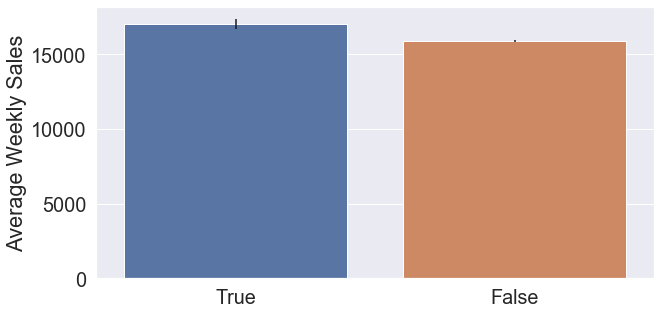

In [139]:
y = []
yerror = []
#Assigns the mean score and 95% confidence limit to each district
for district in x:
    y.append(district_dict[district].mean())
    yerror.append(1.96*district_dict[district].std()/np.sqrt(district_dict[district].shape[0]))    
    print(district + '_std : {}'.format(district_dict[district].std()))
    
sns.set(font_scale=1.8)
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x, y, yerr=yerror)
ax.set_ylabel('Average Weekly Sales')
plt.show()


In [140]:
stats.f_oneway(district_dict['True'], district_dict['False'])

F_onewayResult(statistic=68.8029912658499, pvalue=1.091222267254605e-16)

#### The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among Holiday vs NoHoliday.

#### From our data exploration, we can see that the average Weekly Sales different for each district group. The resulting pvalue was less than 0.05. We can reject the null hypothesis and conclude that there is a significant difference between the Weekly Sales for each district

#### Note:-  Even though we've obtained a very low p-value, we cannot make any assumptions about the magnitude of the effect.

In [141]:
districts = ['True', 'False']

ss_b = 0
for d in districts:
    ss_b += district_dict[d].shape[0] * \
            np.sum((district_dict[d].mean() - data1['Weekly_Sales'].mean())**2)

ss_w = 0
for d in districts:
    ss_w += np.sum((district_dict[d] - district_dict[d].mean())**2)

msb = ss_b/1
msw = ss_w/(len(data1)-2)
f=msb/msw
print('F_statistic: {}'.format(f))

F_statistic: 68.80299126584259


#### We can calculate the magnitude of the effect to determine how large the difference is. One of the measures we can use is Eta-squared.

In [142]:
# Calculating Eta -Square.
ss_t = np.sum((data1['Weekly_Sales']-data1['Weekly_Sales'].mean())**2)        
eta_squared = ss_b/ss_t
print('eta_squared: {}'.format(eta_squared))

eta_squared: 0.00016318070618533695


#### The general rules of thumb given by Cohen and Miles & Shevlin (2001) for analyzing eta-squared, η2:
#### <br>Small effect: 0.01
#### <br>Medium ffect: 0.06
#### <br>Large effect: 0.14
#### <br>From our calculations, the effect size for this ANOVA test would be "Small"

# Task 2:- Perform EDA to determine the aggregated sales(Sum & Avg) per store for each-year(52-weeks). Using this result, also identify whether the Sales were high during Holiday or No-Holiday by each year

In [143]:
# Considering Sales Data for performng the EDA.
Sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [144]:
# FInding Maximum date
Sales_df['Date'].max()

Timestamp('2012-12-10 00:00:00')

In [145]:
# Finding Minimum Date
Sales_df['Date'].min()

Timestamp('2010-01-10 00:00:00')

In [146]:
# Deriving year from the Column Date.
Sales_temp = Sales_df.copy()

In [147]:
Sales_temp['Year'] = Sales_temp['Date'].dt.year

In [148]:
Sales_temp.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year
0,1,1,2010-05-02,24924.50,False,2010
1,1,1,2010-12-02,46039.49,True,2010
2,1,1,2010-02-19,41595.55,False,2010
3,1,1,2010-02-26,19403.54,False,2010
4,1,1,2010-05-03,21827.90,False,2010


In [149]:
# Performing Groupby operation in the Sales_temp dataset.
aggregation = {'Weekly_Sales':  'sum'}
Sales_Aggregated_Sum = Sales_temp.groupby(['Store','Year','IsHoliday']).agg(aggregation).add_prefix('Total ').reset_index()
aggregation = {'Weekly_Sales': 'mean'}
Sales_Aggregated_Average = Sales_temp.groupby(['Store','Year','IsHoliday']).agg(aggregation).add_prefix('Average ').reset_index()

In [150]:
Aggregated_Sales = pd.merge(Sales_Aggregated_Sum,Sales_Aggregated_Average, how='left', on=['Store','Year','IsHoliday'])

In [151]:
Aggregated_Sales.head()

,Store,Year,IsHoliday,Total Weekly_Sales,Average Weekly_Sales
0,1,2010,False,66806469.75,21168.08
1,1,2010,True,6472362.25,22551.78
2,1,2011,False,74201049.28,21595.18
3,1,2011,True,6720869.55,23175.41
4,1,2012,False,64737813.26,22102.36


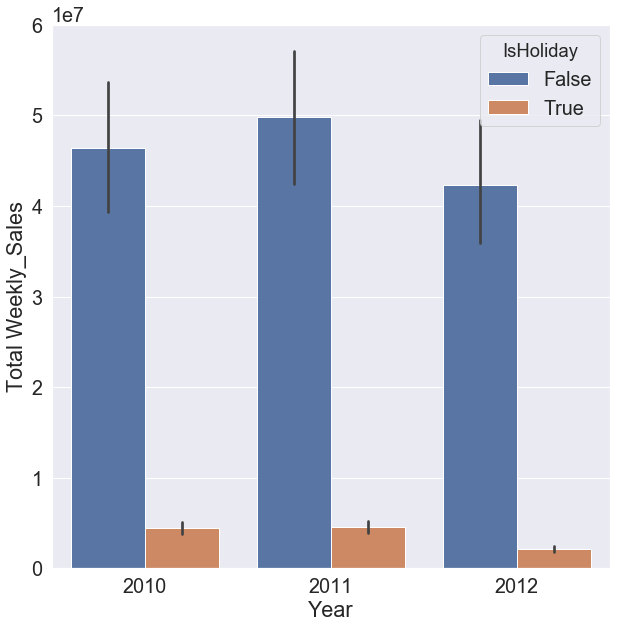

In [152]:
# Total Weekly Sales Per year 
ax = sns.barplot(x="Year", y="Total Weekly_Sales", hue="IsHoliday", data=Aggregated_Sales)

#### For isHoliday= False total weekly sale is high throughout three year(2010,2011,2012)

In [154]:
# Aggregating average weekly sales data using groupby on Year and Isholiday Status.
aggregation = {'Average Weekly_Sales':  'mean'}
Average_Weekly_Sales = Aggregated_Sales.groupby(['Year','IsHoliday']).agg(aggregation).add_prefix('Average ').reset_index()

In [156]:
Average_Weekly_Sales

,Year,IsHoliday,Average Average Weekly_Sales
0,2010,False,15633.40
1,2010,True,16377.83
2,2011,False,15298.35
3,2011,True,16705.26
4,2012,False,15153.98
5,2012,True,15935.15


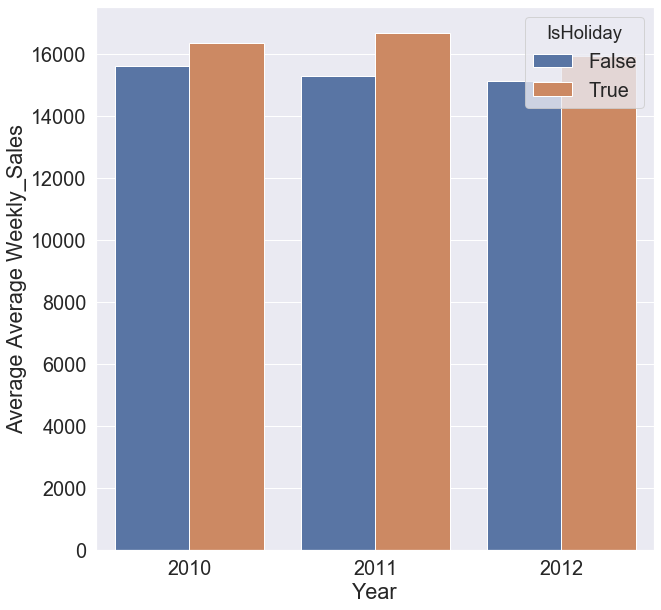

In [157]:
ax = sns.barplot(x="Year", y="Average Average Weekly_Sales", hue="IsHoliday", data=Average_Weekly_Sales)

## Average weekly sales for Isholiday = True is always greater than IsHoliday=False for all the three years.Therefore we can say Average Weekly Sales were high during Holidays.

In [153]:
 g = sns.catplot(x="Year", y="Total Weekly_Sales",
...                 hue="IsHoliday", col="Store",
...                 data=Aggregated_Sales, kind="bar",
...                 height=20, aspect=1);